**BUILDING A PREDICTION MODEL USING THE TEST AND TRAINED DATA OF PROSTATE CANCER DATASET AND IDENTIFYING THEIR SEVERITY BASED ON THEIR ASSOCIATED FEATURES**

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#loading the dataset
df=pd.read_csv("/content/prostate cancer.csv")
df

,id,diagnosis_result,age,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,50,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,58,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,74,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,58,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,62,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...,...
95,96,M,68,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,68,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,58,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,69,21,24,74,413,0.090,0.075,0.162,0.066


In [3]:
df.head()

,id,diagnosis_result,age,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,50,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,58,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,74,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,58,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,62,9,19,135,1297,0.141,0.133,0.181,0.059


In [4]:
#Exploratory Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   age                100 non-null    int64  
 3   radius             100 non-null    int64  
 4   texture            100 non-null    int64  
 5   perimeter          100 non-null    int64  
 6   area               100 non-null    int64  
 7   smoothness         100 non-null    float64
 8   compactness        100 non-null    float64
 9   symmetry           100 non-null    float64
 10  fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 8.7+ KB


In [5]:
#to retrieve statistical information
df.describe()

,id,age,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,63.930000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,7.407688,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,41.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,60.000000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,65.000000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,68.000000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,79.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [6]:
#number of rows and columns
df.shape

(100, 11)

In [7]:
#obtaining data types
df.dtypes

id                     int64
diagnosis_result      object
age                    int64
radius                 int64
texture                int64
perimeter              int64
area                   int64
smoothness           float64
compactness          float64
symmetry             float64
fractal_dimension    float64
dtype: object

In [8]:
#finding missing values
df.isnull().sum()

id                   0
diagnosis_result     0
age                  0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

<Axes: >

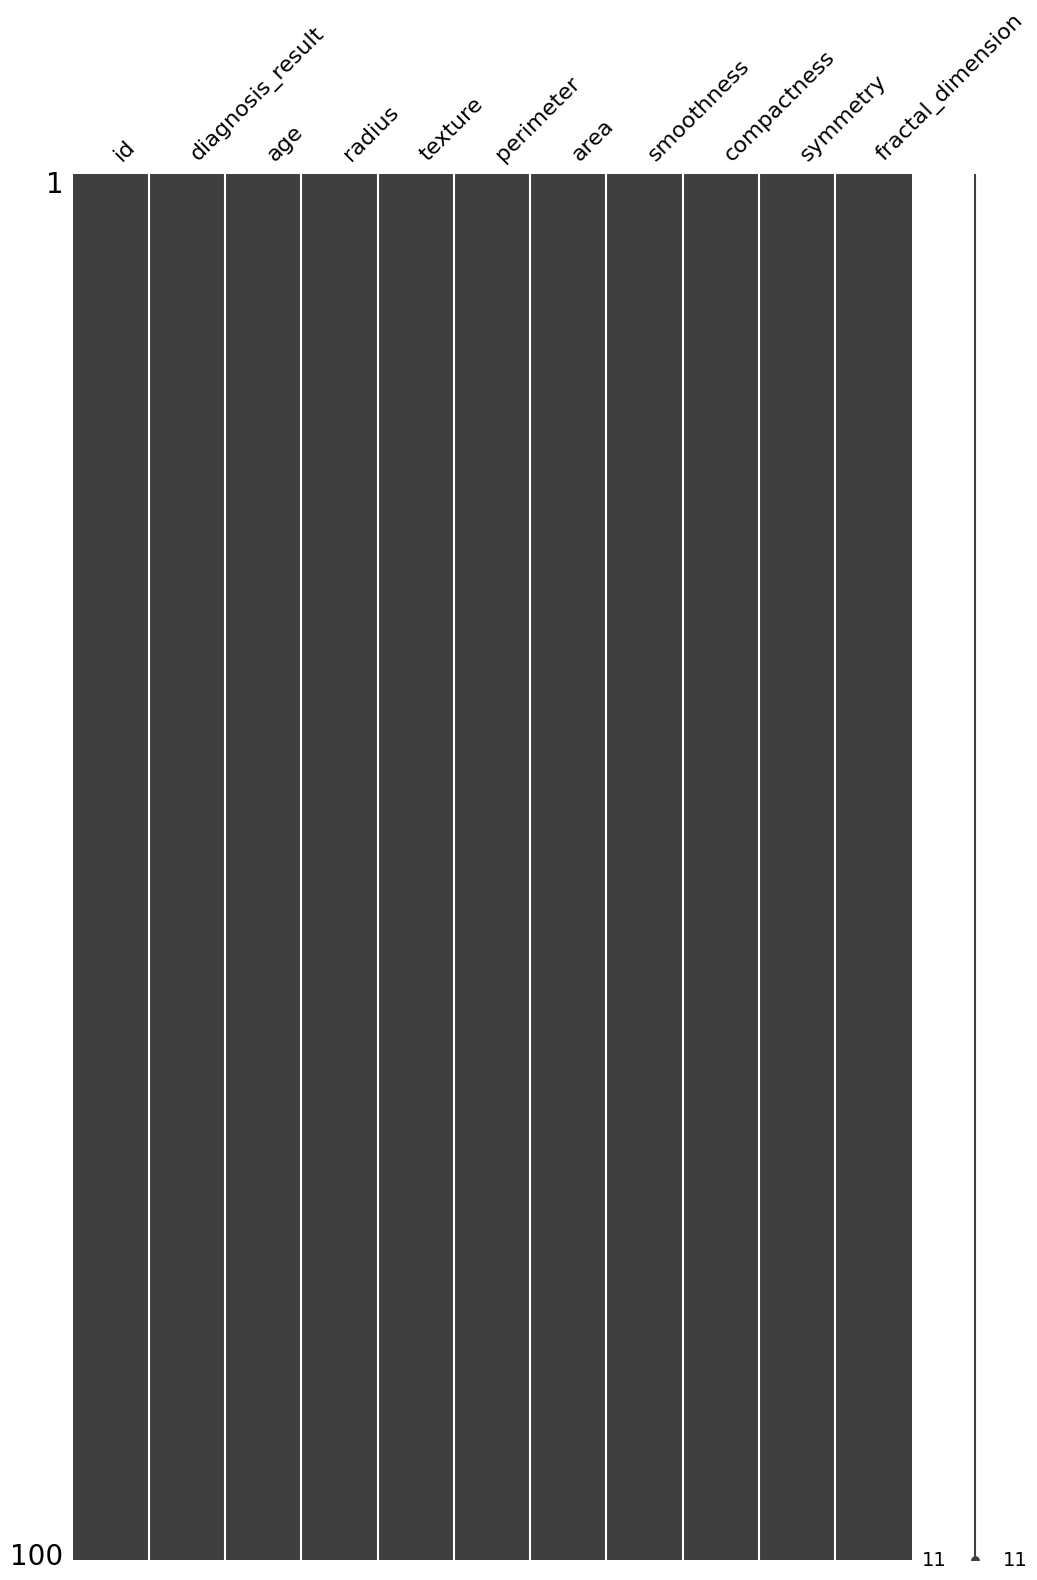

In [9]:
#to visualize missing value
import missingno as msno
msno.matrix(df,figsize=(12,18))

Text(0.5, 1.0, 'Benign/Malignant')

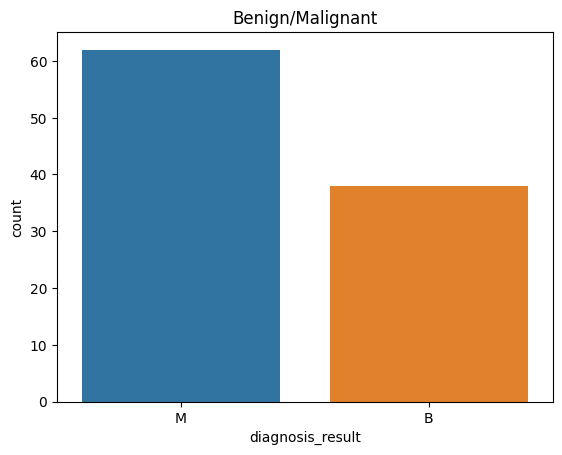

In [10]:
#countplot
import seaborn as sns
sns.countplot(x=df["diagnosis_result"]).set_title("Benign/Malignant")

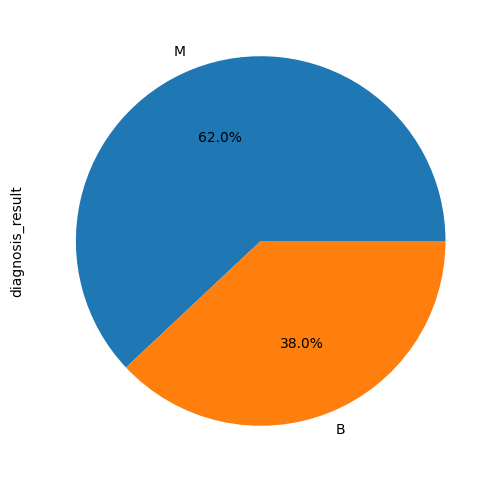

In [11]:
 # Pie Chart
df['diagnosis_result'].value_counts().plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%')
plt.show()

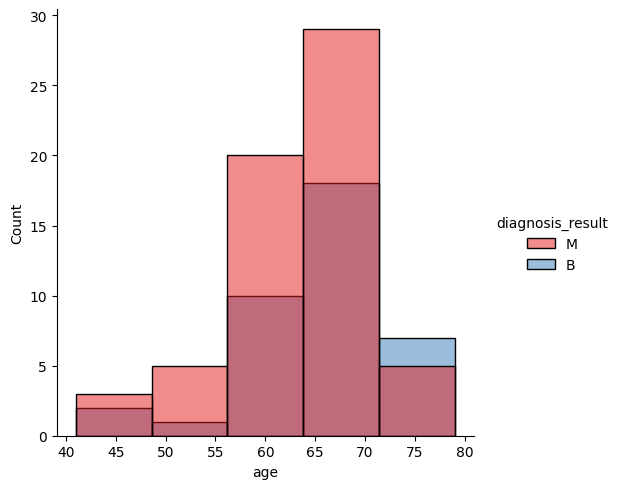

In [12]:
#distplot
sns.displot(data=df,x='age',hue='diagnosis_result',kde=False,bins=5,palette='Set1')



	Diagnosis result w.r.t age


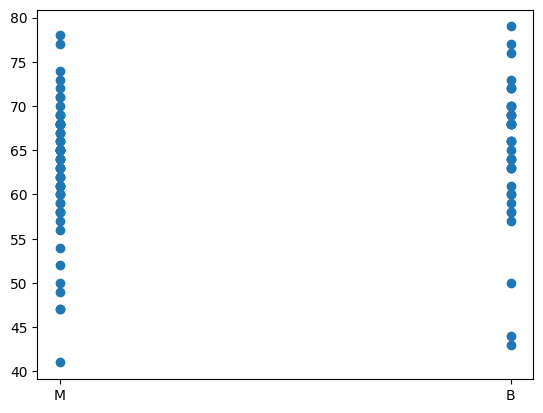

In [13]:
# Scatter Plot

print('\n\tDiagnosis result w.r.t age')
plt.scatter(df['diagnosis_result'], df['age'])
plt.show()


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been ass

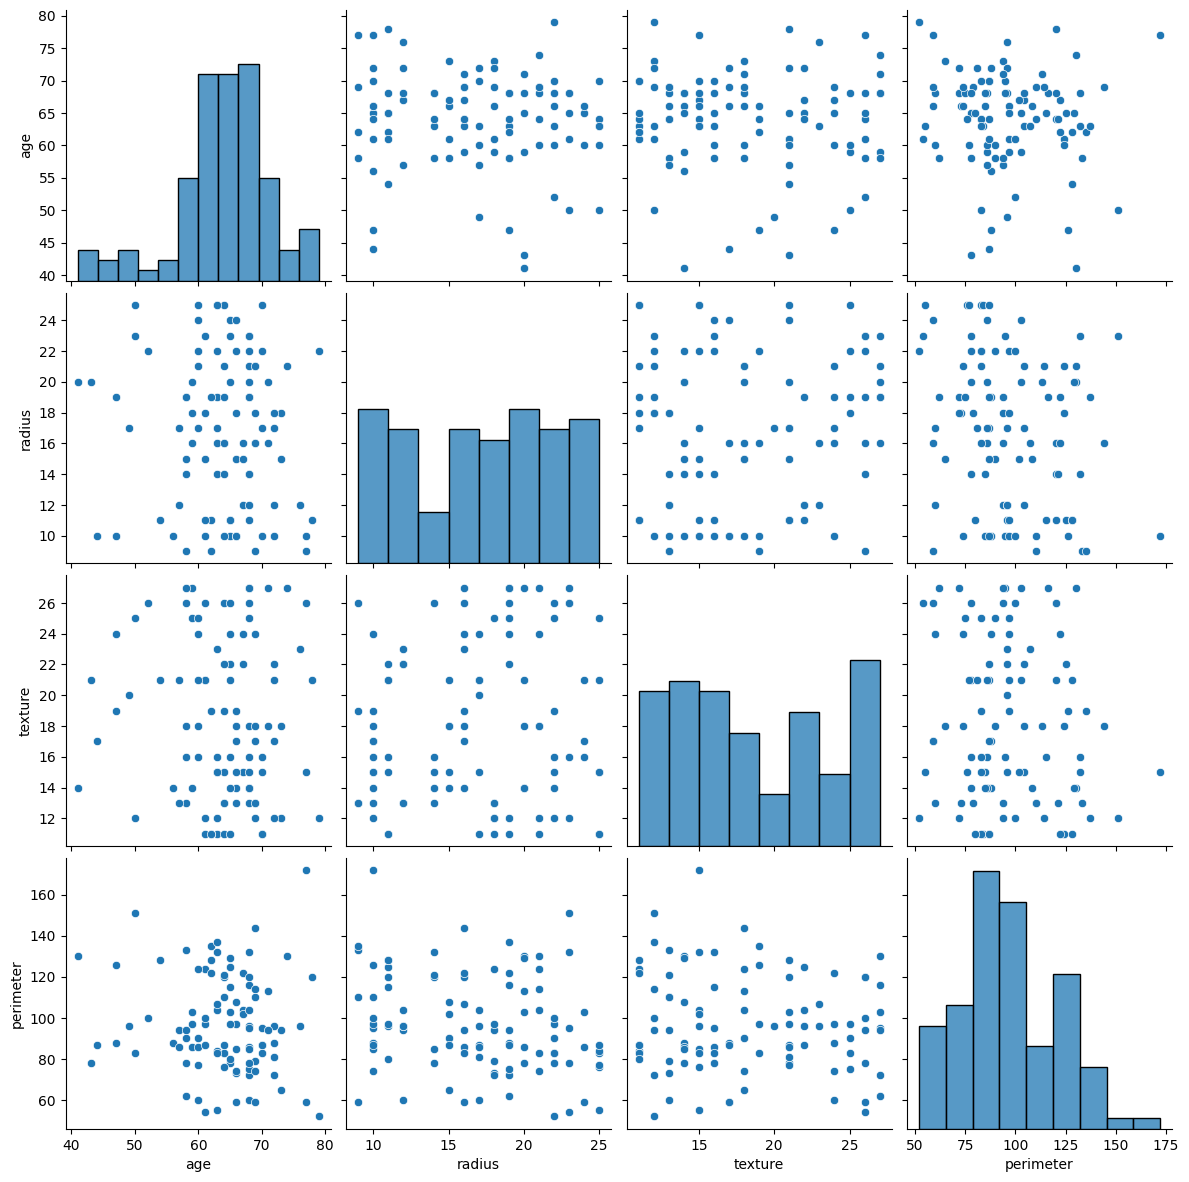

In [14]:
sns.pairplot(df[["age", "radius", "texture", "perimeter"]],
    height = 3,
    palette = "Set1")

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'radius'}>],
       [<Axes: title={'center': 'texture'}>,
        <Axes: title={'center': 'perimeter'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'smoothness'}>,
        <Axes: title={'center': 'compactness'}>,
        <Axes: title={'center': 'symmetry'}>],
       [<Axes: title={'center': 'fractal_dimension'}>, <Axes: >,
        <Axes: >]], dtype=object)

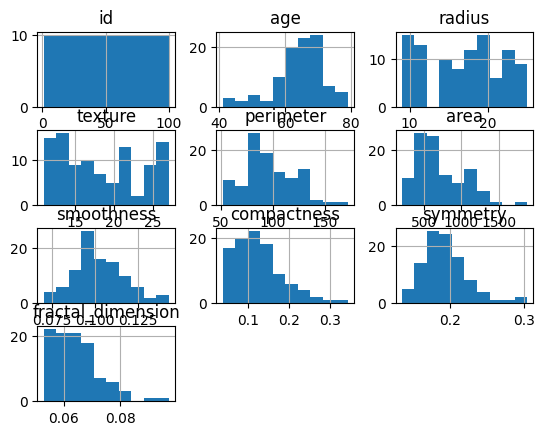

In [15]:
df.hist()

<Axes: >

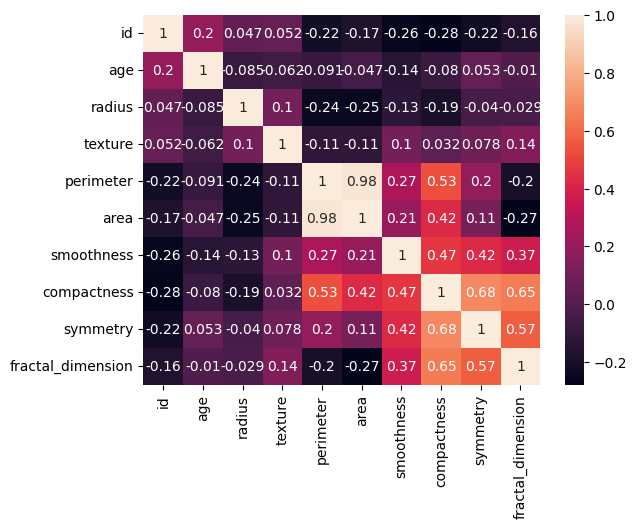

In [16]:

import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [17]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['diagnosis_result']= label_encoder.fit_transform(df['diagnosis_result'])
df['diagnosis_result'].unique()

array([1, 0])

**BUILDING A MODEL**

In [18]:
x = df.drop('diagnosis_result', axis=1)
y = df['diagnosis_result']

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train, y_train)
pred=knn.predict(x_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.94      0.97        17

    accuracy                           0.95        20
   macro avg       0.88      0.97      0.91        20
weighted avg       0.96      0.95      0.95        20

[[ 3  0]
 [ 1 16]]


In [22]:
from sklearn import metrics

In [23]:
print('The accuracy of the KNeighborsClassifier is', metrics.accuracy_score(pred,y_test)*100)

The accuracy of the KNeighborsClassifier is 95.0


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
prediction=lr.predict(x_test)

In [27]:
from sklearn import metrics
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction,y_test)*100)

The accuracy of the Logistic Regression is 90.0


In [28]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)

SVC()

In [29]:
predict=svm.predict(x_test)

In [30]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.88      0.94        17

    accuracy                           0.90        20
   macro avg       0.80      0.94      0.84        20
weighted avg       0.94      0.90      0.91        20

[[ 3  0]
 [ 2 15]]


In [31]:
print('The accuracy of SVC is', metrics.accuracy_score(predict,y_test)*100)

The accuracy of SVC is 90.0


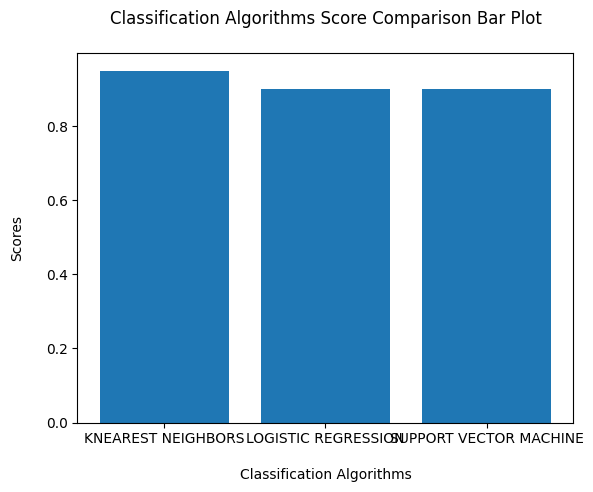

In [32]:
# Comparison of Algorithms

x=['KNEAREST NEIGHBORS', 'LOGISTIC REGRESSION', 'SUPPORT VECTOR MACHINE']
y = [knn.score(x_test,y_test), lr.score(x_test,y_test),svm.score(x_test,y_test)]

plt.bar(x,y)
plt.xlabel('\nClassification Algorithms')
plt.ylabel("Scores\n")
plt.title('Classification Algorithms Score Comparison Bar Plot\n')
plt.show()

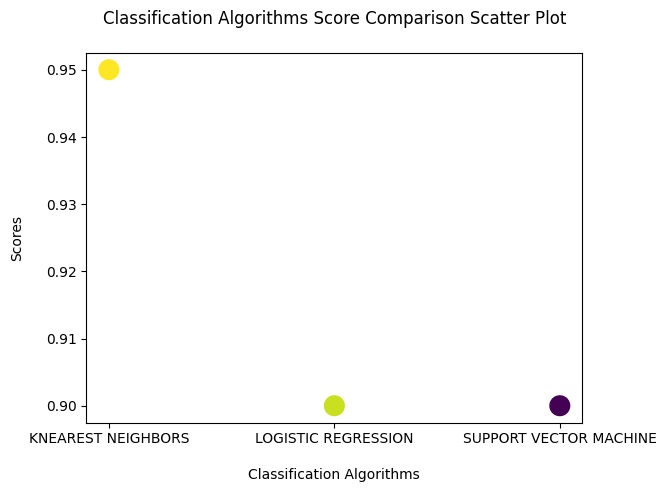

In [33]:
# Scatter Plot
colors = np.random.rand(3)
plt.xlabel('\nClassification Algorithms')
plt.ylabel("Scores\n")
plt.title('Classification Algorithms Score Comparison Scatter Plot\n')
plt.scatter(x, y, s=200, c=colors)
plt.show()

In [34]:
# Compare Scores and Find Out The Best Algorithm

al = False
ln = False
ld = False
nd = False

if lr.score(x_test,y_test) == svm.score(x_test,y_test) and lr.score(x_test,y_test) == knn.score(x_test,y_test) and svm.score(x_test,y_test) == knn.score(x_test,y_test):
    al = True

if lr.score(x_test,y_test) == svm.score(x_test,y_test):
    ln = True
    
if lr.score(x_test,y_test) == knn.score(x_test,y_test):
    ld = True
    
if svm.score(x_test,y_test) == knn.score(x_test,y_test):
    nd = True
      
if al:
    print('\nAll Models Perform The Same\n')
elif ln:
    print('\nLogistic Regression and SVM Performs Better\n')
elif ld:
    print('\nLogistic Regression and KNN Better\n')
elif nd:
    print('\nSVM and KNN Performs Better\n')
else:
    if lr.score(x_test,y_test) > svm.score(x_test,y_test) and lr.score(x_test,y_test) > knn.score(x_test,y_test):
        print('\nLogistic Regression Performs Better\n')
    if svm.score(x_test,y_test) > lr.score(x_test,y_test) and svm.score(x_test,y_test) > knn.score(x_test,y_test):
        print('\nSVM Performs Better\n')
    if knn.score(x_test,y_test) > lr.score(x_test,y_test) and knn.score(x_test,y_test) > svm.score(x_test,y_test):
        print('\nKNN Performs Better\n')


Logistic Regression and SVM Performs Better



In [35]:
#prediction of new unknown data using logistic regression
lr.predict([[75,1,68,21,22,114,917,0,0,0],[75,1,56,21,22,114,917,55,90,78]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0])

In [36]:
#prediction of new unknown data using KNearestNeighbors
knn.predict([[75,1,68,21,22,114,917,0,0,0],[75,1,56,21,22,114,917,55,90,78]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 0])

In [37]:
#prediction of new unknown data using Support Vector Machine
svm.predict([[75,1,68,21,22,114,917,0,0,0],[75,1,56,21,22,114,917,55,90,78]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0, 0])

**INTERPRETATION**

By Taking The Predicted Accuracies into Considerations ,We Concluded that 
* KNN is model Which Shown 95% Accuracy rate respectively.
* Logistic Regression Which Shown 90% Accuracy rate respectively.
* Support Vector Matrix  Shown 90% Accuracy rate respectively.